
## Convolutional Neural Network (CNN)

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Constants
image_size = 224
batch_size = 32
train_data_dir = 'D:/Project/Project/train'
test_data_dir = 'D:/Project/Project/test'


# Data preprocessing (without augmentation)
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# Load and preprocess train and test images
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='categorical'
)

# Calculate input size
input_shape = (image_size, image_size, 3)
input_size = input_shape[0] * input_shape[1] * input_shape[2]

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_size, image_size, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)


Found 1720 images belonging to 2 classes.
Found 629 images belonging to 2 classes.
Epoch 1/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - accuracy: 0.6337 - loss: 1.3271 - val_accuracy: 0.8438 - val_loss: 0.3863
Epoch 2/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7188 - loss: 0.2717 - val_accuracy: 0.7619 - val_loss: 0.2812
Epoch 3/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 52s 975ms/step - accuracy: 0.8530 - loss: 0.3757 - val_accuracy: 0.8750 - val_loss: 0.3262
Epoch 4/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7812 - loss: 0.1854 - val_accuracy: 0.7619 - val_loss: 0.2348
Epoch 5/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 51s 960ms/step - accuracy: 0.8633 - loss: 0.3208 - val_accuracy: 0.9260 - val_loss: 0.2163
Epoch 6/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 0.0589 - val_accuracy: 1.0000 - val_loss: 0.0626
Epoch 7/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 51s 960ms/step - accuracy: 0.9676 - loss: 0.1023 - val_accuracy: 0.9572 - val_loss: 0.1295
Epoch 8/10
53/53 ━━━━━━━━━

In [8]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 512)            │    44,302,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 133,191,368 (508.08 MB)

 Trainable params: 44,397,122 (169.36 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 88,794,246 (338.72 MB)

In [9]:
model.save('cnn_model.h5')

In [10]:
# Load the saved model
from tensorflow.keras.models import load_model

# Load the model
model = load_model('cnn_model.h5')

# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_generator)

print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 224ms/step - accuracy: 0.9581 - loss: 0.1339
Test Loss: 0.09454931318759918
Test Accuracy: 0.9682034850120544


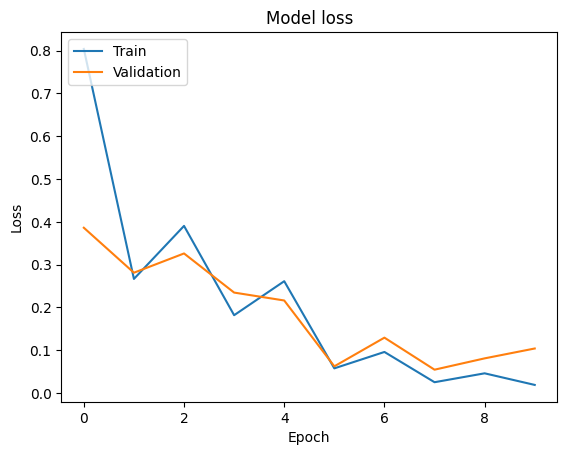

In [11]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [12]:
# Success Rate Calculation

In [13]:
correct_identifications_object1 = 0
correct_identifications_object2 = 0

for i in range(len(test_generator)):
    batch_images, batch_labels = test_generator[i]
    predictions = model.predict(batch_images)
    for j in range(len(batch_labels)):
        if batch_labels[j][0] == 1 and predictions[j][0] >= 0.5:
            correct_identifications_object1 += 1
        elif batch_labels[j][1] == 1 and predictions[j][1] >= 0.5:
            correct_identifications_object2 += 1

# Calculate success rate using the provided law
success_rate = (correct_identifications_object1 + correct_identifications_object2) / 20

print("Success Rate:", success_rate)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
Success Rate: 30.45


## Testing Using Unseen Image. 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Predicted class: banana


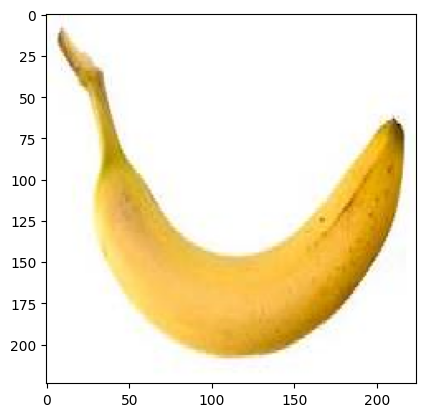

In [14]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Choose the path to the image you want to test (replace 'path_to_image.jpg' with the actual path)
image_path = "D:\Project\Project\Banana_img_for_test.jpeg"

# Load and preprocess the image
img = image.load_img(image_path, target_size=(image_size, image_size))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0  # Normalize the pixel values

# Make predictions
predictions = model.predict(img_array)

# Decode the predictions
predicted_class = np.argmax(predictions)
class_labels = train_generator.class_indices
predicted_label = [k for k, v in class_labels.items() if v == predicted_class][0]

print(f"Predicted class: {predicted_label}")
plt.imshow(img)
